In [125]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer 

In [2]:
df_char = pd.read_csv('data/simpsons_characters.csv', error_bad_lines=False)
df_char

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
5,24,Little Boy,little boy,NaN
6,26,Lewis Clark,lewis clark,NaN
7,27,Little Girl,little girl,NaN
8,29,Bubbles,bubbles,NaN
9,30,Moldy,moldy,NaN


In [3]:
df_ep = pd.read_csv('data/simpsons_episodes.csv', error_bad_lines=False)
df_ep

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
0,10,Homer's Night Out,1990-03-25,7G10,1,10,10,30.30,50816.0,7.4,1511.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275197507879
1,12,Krusty Gets Busted,1990-04-29,7G12,1,12,12,30.40,62561.0,8.3,1716.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/288019523914
2,14,"Bart Gets an ""F""",1990-10-11,7F03,2,1,14,33.60,59575.0,8.2,1638.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459671
3,17,Two Cars in Every Garage and Three Eyes on Eve...,1990-11-01,7F01,2,4,17,26.10,64959.0,8.1,1457.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260537411822
4,19,Dead Putting Society,1990-11-15,7F08,2,6,19,25.40,50691.0,8.0,1366.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459670
5,21,Bart the Daredevil,1990-12-06,7F06,2,8,21,26.20,57605.0,8.4,1522.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459702
6,23,Bart Gets Hit by a Car,1991-01-10,7F10,2,10,23,24.80,56486.0,7.8,1340.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260550723760
7,26,Homer vs. Lisa and the 8th Commandment,1991-02-07,7F13,2,13,26,26.20,58277.0,8.0,1329.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260820547692
8,28,"Oh Brother, Where Art Thou?",1991-02-21,7F16,2,15,28,26.80,47426.0,8.2,1413.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/272046659561
9,30,Old Money,1991-03-28,7F17,2,17,30,21.20,44331.0,7.6,1243.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/263504963955


In [4]:
df_locations = pd.read_csv('data/simpsons_locations.csv', error_bad_lines=False)
df_locations

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home
5,6,KITCHEN,kitchen
6,7,SHOPPING MALL PARKING LOT,shopping mall parking lot
7,8,Springfield Mall,springfield mall
8,9,The Happy Sailor Tattoo Parlor,the happy sailor tattoo parlor
9,10,Springfield Nuclear Power Plant,springfield nuclear power plant


In [5]:
df_script = pd.read_csv('data/simpsons_script_lines.csv', error_bad_lines=False)
df_script

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0
5,9554,32,214,Martin Prince: (HOARSE WHISPER) I don't think ...,877000,True,38,3.0,Martin Prince,Springfield Elementary School,I don't think there's anything left to say.,i dont think theres anything left to say,8.0
6,9555,32,215,Edna Krabappel-Flanders: Bart?,881000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,Bart?,bart,1.0
7,9556,32,216,Bart Simpson: Victory party under the slide!,882000,True,8,3.0,Bart Simpson,Springfield Elementary School,Victory party under the slide!,victory party under the slide,5.0
8,9557,32,217,(Apartment Building: Ext. apartment building -...,889000,False,NaN,374.0,NaN,Apartment Building,NaN,NaN,NaN
9,9558,32,218,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...,889000,True,9,374.0,Lisa Simpson,Apartment Building,Mr. Bergstrom! Mr. Bergstrom!,mr bergstrom mr bergstrom,4.0


In [6]:
df = df_script.merge(df_char.rename(columns={'id':'character_id'}), on=['character_id'])
df = df.merge(df_locations.rename(columns={'id':'location_id'}), on='location_id', suffixes=('', '_loc'))
df['character_id'] = df['character_id'].astype(int)
df['location_id'] = df['location_id'].astype(int)
df = df.dropna(subset=['normalized_text']).reset_index(drop=True)

In [7]:
# Run count vectorizer on script data
cv = CountVectorizer(stop_words='english', min_df=2, max_df=0.95)
cv_text = cv.fit_transform(df['normalized_text'])
cv_feature_names = cv.get_feature_names()

In [8]:
train_x, test_x, train_y, test_y = train_test_split(cv_text, df['character_id'], test_size=.67)
y = pd.DataFrame()

logr = LogisticRegression(verbose=True)
logr.fit(train_x, train_y)
y_pred = logr.predict_proba(test_x)
y = pd.DataFrame(y_pred)
y['y_true'] = test_y 

[LibLinear]

In [9]:
y

,0,1,2,3,4,5,6,7,8,9,...,3119,3120,3121,3122,3123,3124,3125,3126,3127,y_true
0,0.036710,0.134908,0.003745,0.000764,0.000786,0.000349,0.000187,0.061339,0.059863,0.001226,...,0.000169,0.000180,0.000167,0.000168,0.000231,0.000164,0.000169,0.000169,0.000168,NaN
1,0.006722,0.242151,0.010418,0.000233,0.000531,0.000370,0.000166,0.017905,0.013008,0.001775,...,0.000153,0.000160,0.000151,0.000152,0.000189,0.000149,0.000153,0.000153,0.000153,464.0
2,0.036091,0.216064,0.011874,0.000190,0.000383,0.000169,0.000138,0.022542,0.101292,0.001691,...,0.000129,0.000134,0.000128,0.000128,0.000157,0.000126,0.000129,0.000129,0.000129,NaN
3,0.022671,0.122542,0.003496,0.000303,0.000584,0.000292,0.000167,0.141006,0.044743,0.000756,...,0.000151,0.000160,0.000149,0.000150,0.000204,0.000147,0.000151,0.000151,0.000150,464.0
4,0.015645,0.081151,0.000666,0.000385,0.000157,0.000062,0.000074,0.067463,0.533201,0.002330,...,0.000071,0.000072,0.000071,0.000071,0.000076,0.000070,0.000072,0.000071,0.000071,NaN
5,0.029315,0.114215,0.005468,0.000421,0.001063,0.000411,0.000212,0.028032,0.039388,0.004450,...,0.000190,0.000203,0.000187,0.000189,0.000265,0.000184,0.000190,0.000190,0.000189,464.0
6,0.041799,0.207616,0.015351,0.000582,0.000458,0.000269,0.000170,0.035263,0.008782,0.001285,...,0.000156,0.000164,0.000154,0.000155,0.000202,0.000151,0.000156,0.000156,0.000155,464.0
7,0.025271,0.021018,0.005465,0.000327,0.000839,0.000325,0.000164,0.172521,0.186104,0.001563,...,0.000147,0.000157,0.000145,0.000146,0.000205,0.000143,0.000147,0.000147,0.000146,464.0
8,0.042746,0.059639,0.006766,0.000440,0.001117,0.000435,0.000220,0.025166,0.030707,0.002040,...,0.000197,0.000211,0.000194,0.000196,0.000275,0.000191,0.000197,0.000197,0.000196,464.0
9,0.019449,0.055996,0.022239,0.000392,0.000882,0.000384,0.000205,0.072551,0.028483,0.001274,...,0.000185,0.000197,0.000182,0.000184,0.000254,0.000179,0.000185,0.000185,0.000184,464.0


In [10]:
y['y_pred'] = logr.predict(test_x)

In [11]:
logr_output = y.dropna()

In [12]:
accuracy_score(logr_output['y_true'], logr_output['y_pred'])

0.17141335081752243

In [20]:
char = 9
accuracy_score(logr_output.loc[logr_output['y_true']==char, 'y_true'], logr_output.loc[logr_output['y_true']==char, 'y_pred'])

0.082384052074857606

In [14]:
df_char.sort_values('id')

,id,name,normalized_name,gender
70,1,Marge Simpson,marge simpson,f
6659,2,Homer Simpson,homer simpson,m
74,3,Seymour Skinner,seymour skinner,m
98,4,JANEY,janey,f
89,5,Todd Flanders,todd flanders,m
92,6,Dewey Largo,dewey largo,m
0,7,Children,children,NaN
71,8,Bart Simpson,bart simpson,m
72,9,Lisa Simpson,lisa simpson,f
85,10,Patty Bouvier,patty bouvier,f


In [15]:
logr_output['y_true'].value_counts()

2.0       10930
1.0        5500
8.0        5172
9.0        4916
15.0       1212
17.0       1077
3.0        1021
11.0        807
31.0        712
71.0        699
25.0        687
139.0       493
101.0       491
208.0       441
165.0       428
14.0        388
211.0       362
170.0       337
40.0        286
332.0       285
404.0       239
1078.0      236
140.0       230
119.0       230
240.0       228
18.0        217
22.0        188
801.0       183
153.0       182
52.0        182
          ...  
5999.0        1
1985.0        1
2293.0        1
3078.0        1
2692.0        1
1289.0        1
4570.0        1
1229.0        1
3250.0        1
4936.0        1
5980.0        1
2655.0        1
487.0         1
1245.0        1
4571.0        1
5460.0        1
2339.0        1
4419.0        1
839.0         1
2318.0        1
3222.0        1
2823.0        1
3962.0        1
4866.0        1
5888.0        1
1068.0        1
4978.0        1
42.0          1
416.0         1
320.0         1
Name: y_true, Length: 27

In [21]:
logr_output = logr_output[['y_true', 'y_pred']]

In [31]:
df['location_id']

0            3
1            3
2            3
3            3
4            3
5            3
6            3
7            3
8            3
9            3
10           3
11           3
12           3
13           3
14           3
15           3
16           3
17           3
18           3
19           3
20           3
21           3
22           3
23           3
24           3
25           3
26           3
27           3
28           3
29           3
          ... 
108646    4027
108647    4027
108648    4027
108649    4027
108650    4027
108651    4027
108652    4027
108653    4027
108654    4027
108655    4027
108656    4027
108657    4027
108658    4027
108659    4028
108660    4028
108661    4028
108662    4028
108663    4028
108664    4028
108665    4028
108666    4028
108667    4028
108668    4028
108669    4028
108670    4029
108671    4024
108672    4024
108673    4024
108674    4024
108675    4049
Name: location_id, Length: 108676, dtype: int32

In [47]:
loc_id = df['location_id'].sample(5000, random_state=0)
chars = df.loc[loc_id.index.values,'character_id']

In [52]:
from scipy import sparse
cv_text[loc_id.index.values]

<5000x20395 sparse matrix of type '<class 'numpy.int64'>'
	with 23201 stored elements in Compressed Sparse Row format>

In [70]:
loc_and_text = sparse.hstack([sparse.csr_matrix(loc_id).transpose(), cv_text[loc_id.index.values]]) 

In [72]:
train_x, test_x, train_y, test_y = train_test_split(loc_and_text, chars, test_size=.67)
y = pd.DataFrame()

logr2 = LogisticRegression(verbose=True)
logr2.fit(train_x, train_y)
y = pd.DataFrame()
y['y_true'] = test_y 
y['y_pred'] = logr2.predict(test_x)

[LibLinear]

In [73]:
logr_output2 = y.dropna()

In [74]:
accuracy_score(logr_output2['y_true'], logr_output2['y_pred'])

0.21731343283582089

In [111]:
char_acc = pd.DataFrame()
for char in df_char['id'].unique():
    temp = pd.DataFrame()
    temp['character'] = [df_char.loc[df_char['id'] == char, 'normalized_name'].values[0]]
    temp['character_id'] = char
    temp['script'] = accuracy_score(logr_output.loc[logr_output['y_true']==char, 'y_true'], logr_output.loc[logr_output['y_true']==char, 'y_pred'])
    temp['loc_and_script'] = accuracy_score(logr_output2.loc[logr_output2['y_true']==char, 'y_true'], logr_output2.loc[logr_output2['y_true']==char, 'y_pred'])
    temp['model_diff'] = accuracy_score(logr_output2.loc[logr_output2['y_true']==char, 'y_true'], logr_output2.loc[logr_output2['y_true']==char, 'y_pred']) - accuracy_score(logr_output.loc[logr_output['y_true']==char, 'y_true'], logr_output.loc[logr_output['y_true']==char, 'y_pred'])
    temp['model_p_diff'] = (accuracy_score(logr_output2.loc[logr_output2['y_true']==char, 'y_true'], logr_output2.loc[logr_output2['y_true']==char, 'y_pred']) - accuracy_score(logr_output.loc[logr_output['y_true']==char, 'y_true'], logr_output.loc[logr_output['y_true']==char, 'y_pred']))/accuracy_score(logr_output.loc[logr_output['y_true']==char, 'y_true'], logr_output.loc[logr_output['y_true']==char, 'y_pred'])
    char_acc = char_acc.append(temp, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


In [113]:
char_acc_filtered = char_acc.loc[char_acc['model_diff']!=0].dropna()

In [103]:
char_acc_melt = pd.melt(char_acc_filtered[['character', 'script', 'loc_and_script']], id_vars='character')

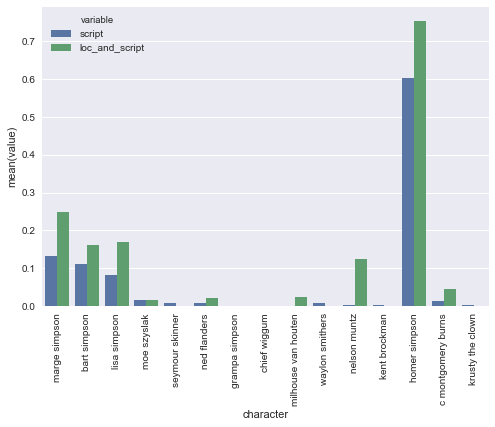

In [108]:
sns.barplot(x='character', y='value', hue='variable', data=char_acc_melt)
plt.xticks(rotation=90)
plt.show()

In [122]:
char_acc_filtered

,character,character_id,script,loc_and_script,model_diff,model_p_diff
70,marge simpson,1,0.132182,0.248387,0.116205,0.879132
71,bart simpson,8,0.111756,0.160458,0.048703,0.435798
72,lisa simpson,9,0.082384,0.169675,0.087291,1.059562
73,moe szyslak,17,0.016713,0.016393,-0.000320,-0.019126
74,seymour skinner,3,0.006856,0.000000,-0.006856,-1.000000
75,ned flanders,11,0.007435,0.021277,0.013842,1.861702
76,grampa simpson,31,0.001404,0.000000,-0.001404,-1.000000
77,chief wiggum,71,0.001431,0.000000,-0.001431,-1.000000
78,milhouse van houten,25,0.000000,0.023256,0.023256,inf
79,waylon smithers,14,0.007732,0.000000,-0.007732,-1.000000


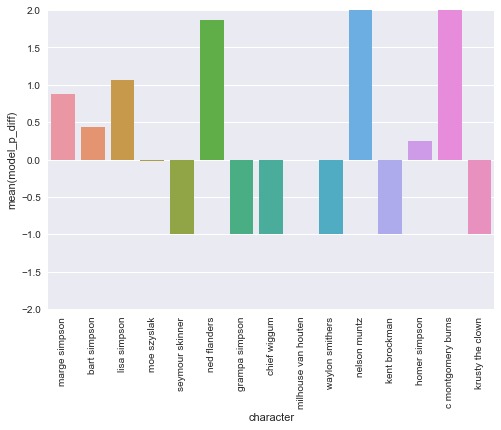

In [120]:
g = sns.barplot(x='character', y='model_p_diff', data=char_acc_filtered)
g.set_ylim(bottom=-2, top=2)
plt.xticks(rotation=90)
plt.show()

In [160]:
train_x, test_x, train_y, test_y = train_test_split(loc_and_text, chars, test_size=.67)

rf = RandomForestClassifier(max_depth=3, max_features=None, verbose=True)
rf.fit(train_x, train_y)

y2 = pd.DataFrame()
y2['y_true'] = test_y 
y2['y_pred'] = rf.predict(test_x)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [127]:
y

,y_true,y_pred
21873,1,1
89127,8,2
24405,11,2
74042,699,2
23864,1,2
27678,817,2
34007,2144,2
194,9,2
32057,5119,2
19880,1,2


In [161]:
accuracy_score(y2['y_true'], y2['y_pred'])

0.22597014925373135

In [169]:
char = 2
accuracy_score(y2.loc[y2['y_true']==char, 'y_true'], y2.loc[y2['y_true']==char, 'y_pred'])

0.9888579387186629

In [148]:
params = {'n_estimators': [100, 250, 500],
          'max_depth': [3,5,7]}
gs = GridSearchCV(RandomForestClassifier(max_features=None), params, 
                  scoring='accuracy', cv=5, verbose=True)
gs.fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  8.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 250, 500], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [149]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,11.793857,0.267022,0.245455,0.288189,7,250,"{'max_depth': 7, 'n_estimators': 250}",1,0.137417,0.355641,...,0.312030,0.273844,0.327801,0.261888,0.350877,0.266526,2.298118,0.065597,0.086831,0.034476
8,23.922410,0.557225,0.244242,0.286902,7,500,"{'max_depth': 7, 'n_estimators': 500}",2,0.135762,0.352772,...,0.304511,0.274566,0.331950,0.259049,0.350877,0.265823,4.536581,0.077019,0.087293,0.033860
6,4.656811,0.098257,0.243636,0.287774,7,100,"{'max_depth': 7, 'n_estimators': 100}",3,0.135762,0.361377,...,0.312030,0.270954,0.323651,0.261888,0.346491,0.261603,0.866498,0.019559,0.086289,0.037623
3,3.522897,0.101200,0.243030,0.265525,5,100,"{'max_depth': 5, 'n_estimators': 100}",4,0.135762,0.328872,...,0.308271,0.239162,0.327801,0.245564,0.346491,0.249648,0.642139,0.020052,0.086312,0.032740
4,8.847575,0.269436,0.242424,0.265694,5,250,"{'max_depth': 5, 'n_estimators': 250}",5,0.135762,0.334608,...,0.308271,0.241329,0.327801,0.242725,0.342105,0.245429,1.486777,0.062029,0.085596,0.035448
5,17.474087,0.511000,0.239394,0.264353,5,500,"{'max_depth': 5, 'n_estimators': 500}",6,0.134106,0.325048,...,0.293233,0.241329,0.327801,0.242725,0.342105,0.247539,3.043783,0.083859,0.084646,0.031512
0,2.408408,0.098704,0.236364,0.246045,3,100,"{'max_depth': 3, 'n_estimators': 100}",7,0.132450,0.310707,...,0.300752,0.226156,0.323651,0.230660,0.337719,0.222222,0.362252,0.021576,0.084604,0.032900
1,5.990838,0.246401,0.235152,0.247527,3,250,"{'max_depth': 3, 'n_estimators': 250}",8,0.132450,0.311663,...,0.296992,0.226879,0.319502,0.232789,0.337719,0.224332,0.900204,0.051054,0.083530,0.032637
2,11.976275,0.516918,0.235152,0.246156,3,500,"{'max_depth': 3, 'n_estimators': 500}",8,0.130795,0.310707,...,0.300752,0.228324,0.319502,0.232079,0.337719,0.222925,1.771746,0.091533,0.084735,0.032592


In [151]:
train_x, test_x, train_y, test_y = train_test_split(loc_and_text, chars, test_size=.67)

rf = RandomForestClassifier(n_estimators=250, max_depth=7, max_features=None, verbose=True)
rf.fit(train_x, train_y)

y = pd.DataFrame()
y['y_true'] = test_y 
y['y_pred'] = rf.predict(test_x)

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   15.2s finished
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    2.4s finished


In [152]:
accuracy_score(y['y_true'], y['y_pred'])

0.24029850746268658

In [168]:
char = 2
accuracy_score(y.loc[y['y_true']==char, 'y_true'], y.loc[y['y_true']==char, 'y_pred'])

0.93561643835616437